In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import numpy
import glob
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
import scipy
from tensorflow.keras.callbacks import ModelCheckpoint
from PIL import Image

In [ ]:
pip install opendatasets

In [ ]:
od.download(
    "https://www.kaggle.com/datasets/gpiosenka/100-bird-species/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tekinbayrakl
Your Kaggle Key: ··········
Your Kaggle Key: ··········
Your Kaggle Key:


Abort: 

In [ ]:
! pip install -q kaggle


from google.colab import files

files.upload()

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json


! kaggle datasets list

! kaggle datasets download -d gpiosenka/100-bird-species

! unzip 100-bird-species.zip

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: train/WHITE TAILED TROPIC/120.jpg  
  inflating: train/WHITE TAILED TROPIC/121.jpg  
  inflating: train/WHITE TAILED TROPIC/122.jpg  
  inflating: train/WHITE TAILED TROPIC/123.jpg  
  inflating: train/WHITE TAILED TROPIC/124.jpg  
  inflating: train/WHITE TAILED TROPIC/125.jpg  
  inflating: train/WHITE TAILED TROPIC/126.jpg  
  inflating: train/WHITE TAILED TROPIC/127.jpg  
  inflating: train/WHITE TAILED TROPIC/128.jpg  
  inflating: train/WHITE TAILED TROPIC/129.jpg  
  inflating: train/WHITE TAILED TROPIC/130.jpg  
  inflating: train/WHITE TAILED TROPIC/131.jpg  
  inflating: train/WHITE TAILED TROPIC/132.jpg  
  inflating: train/WHITE TAILED TROPIC/133.jpg  
  inflating: train/WHITE TAILED TROPIC/134.jpg  
  inflating: train/WHITE TAILED TROPIC/135.jpg  
  inflating: train/WHITE TAILED TROPIC/136.jpg  
  inflating: train/WHITE TAILED TROPIC/137.jpg  
  inflating: train/WHITE TAILED TROPIC/138.jpg  
  inflating: train/WHI

In [ ]:
import os
num_of_bird_groups = len(os.listdir("100-bird-species/train/"))
num_of_bird_groups

FileNotFoundError: [Errno 2] No such file or directory: '100-bird-species/train/'

In [ ]:
import pathlib
import numpy as np

data_dir = pathlib.Path("100-bird-species/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # creating a list of class names from subdirectory
print(class_names)

['ABBOTTS BABBLER' 'ABBOTTS BOOBY' 'ABYSSINIAN GROUND HORNBILL'
 'AFRICAN CROWNED CRANE' 'AFRICAN EMERALD CUCKOO' 'AFRICAN FIREFINCH'
 'AFRICAN OYSTER CATCHER' 'AFRICAN PIED HORNBILL' 'AFRICAN PYGMY GOOSE'
 'ALBATROSS' 'ALBERTS TOWHEE' 'ALEXANDRINE PARAKEET' 'ALPINE CHOUGH'
 'ALTAMIRA YELLOWTHROAT' 'AMERICAN AVOCET' 'AMERICAN BITTERN'
 'AMERICAN COOT' 'AMERICAN DIPPER' 'AMERICAN FLAMINGO'
 'AMERICAN GOLDFINCH' 'AMERICAN KESTREL' 'AMERICAN PIPIT'
 'AMERICAN REDSTART' 'AMERICAN ROBIN' 'AMERICAN WIGEON'
 'AMETHYST WOODSTAR' 'ANDEAN GOOSE' 'ANDEAN LAPWING' 'ANDEAN SISKIN'
 'ANHINGA' 'ANIANIAU' 'ANNAS HUMMINGBIRD' 'ANTBIRD' 'ANTILLEAN EUPHONIA'
 'APAPANE' 'APOSTLEBIRD' 'ARARIPE MANAKIN' 'ASHY STORM PETREL'
 'ASHY THRUSHBIRD' 'ASIAN CRESTED IBIS' 'ASIAN DOLLARD BIRD'
 'ASIAN GREEN BEE EATER' 'ASIAN OPENBILL STORK' 'AUCKLAND SHAQ'
 'AUSTRAL CANASTERO' 'AUSTRALASIAN FIGBIRD' 'AVADAVAT' 'AZARAS SPINETAIL'
 'AZURE BREASTED PITTA' 'AZURE JAY' 'AZURE TANAGER' 'AZURE TIT'
 'BAIKAL TEAL' 'BALD EAGLE

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setting up the image directory
  target_folder = target_dir + target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #read image and plotting it
  img = mpimg.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

In [ ]:
import numpy as np
import pandas as pd
import os
import numpy
import glob
import cv2
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

Image shape: (224, 224, 3)


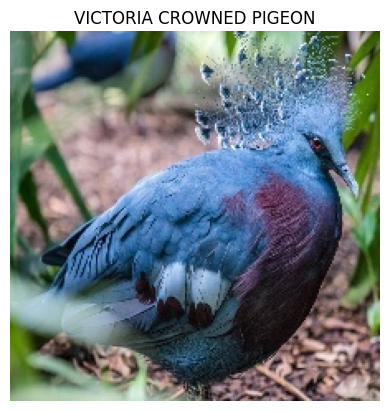

In [ ]:
img = view_random_image(target_dir = "100-bird-species/train/",
                        target_class = "VICTORIA CROWNED PIGEON") # or we can write nike instead of converse to see converse examples

In [ ]:
import tensorflow as tf
img.shape #(width, height, colour channels)

(224, 224, 3)

Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)


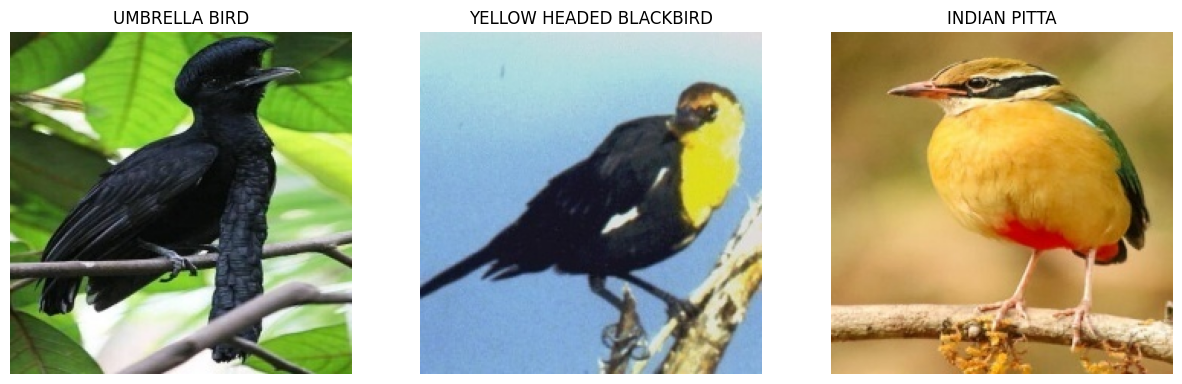

In [ ]:
plt.figure(figsize = (15,7))
plt.subplot(1,3,1)
steak_image = view_random_image("valid/", "UMBRELLA BIRD")
plt.subplot(1,3,2)
pizza_image = view_random_image("train/", "YELLOW HEADED BLACKBIRD")
plt.subplot(1,3,3)
pizza_image = view_random_image("test/", "INDIAN PITTA")

In [ ]:
import matplotlib.pyplot as plt
import pathlib, os, random
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow as tf

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential

In [ ]:
train_dir = "train/"
test_dir = "test/"
val_dir = "valid/"

In [ ]:
# Rescale
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# data transfer from directories to batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size= 32,
                                               target_size= (224,224),
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "categorical")

val_data = valid_datagen.flow_from_directory(directory = val_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "categorical")

Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


In [ ]:


# 1. Create a base model with tf.keras.applications

base_model = tf.keras.applications.ResNet50(include_top= False,)

# 2. Freeze the base model
for r in base_model.layers:
    r.trainable=False

#3. Create inputs into models
inputs = tf.keras.layers.Input(shape =(224,224,3), name = "input-layer")

#4. Rescaling
x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

#5. Pass the inputs
x = base_model(inputs)

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
x = tf.keras.layers.Dense(512, activation='relu', name="dense_layer_1")(x)
x = tf.keras.layers.BatchNormalization(name="batch_norm_layer")(x)
x = tf.keras.layers.Dropout(0.5, name="dropout_layer")(x)
outputs = tf.keras.layers.Dense(525, activation='softmax', name="output-layer")(x)


# 8. Combine the inputs with outputs into a model
model_0 = tf.keras.Model(inputs, outputs)



model_0.compile(loss = "categorical_crossentropy",
                optimizer =  tf.keras.optimizers.Adam(learning_rate=0.0001,beta_1=0.9,beta_2=0.999,epsilon=1e-07),
                metrics = ["accuracy"])


"""history = model_0.fit(train_data,
                                 epochs=40,
                                 steps_per_epoch = len(train_data),
                                 validation_data = val_data,
                                 validation_steps = int(0.25*len(val_data)),)"""

94765736/94765736 [==============================] - 0s 0us/step


'history = model_0.fit(train_data,\n                                 epochs=40,\n                                 steps_per_epoch = len(train_data),\n                                 validation_data = val_data,\n                                 validation_steps = int(0.25*len(val_data)),)'

In [ ]:
for a in model_0.layers:
  print(a)

In [ ]:
history = model_0.fit(train_data,
                                 epochs=10,
                                 steps_per_epoch = len(train_data),
                                 validation_data = val_data,
                                 validation_steps = int(0.25*len(val_data)),)
model_0.save("resnet50_1.h5")

Epoch 1/10
2645/2645 [==============================] - 315s 113ms/step - loss: 5.9913 - accuracy: 0.0190 - val_loss: 5.7033 - val_accuracy: 0.0375
Epoch 2/10
2645/2645 [==============================] - 295s 112ms/step - loss: 5.4584 - accuracy: 0.0541 - val_loss: 5.2101 - val_accuracy: 0.0891
Epoch 3/10
2645/2645 [==============================] - 295s 112ms/step - loss: 5.1499 - accuracy: 0.0829 - val_loss: 4.8776 - val_accuracy: 0.1422
Epoch 4/10
2645/2645 [==============================] - 295s 111ms/step - loss: 4.9141 - accuracy: 0.1089 - val_loss: 4.7658 - val_accuracy: 0.1391
Epoch 5/10
2645/2645 [==============================] - 295s 112ms/step - loss: 4.7445 - accuracy: 0.1270 - val_loss: 4.8247 - val_accuracy: 0.1266
Epoch 6/10
2645/2645 [==============================] - 296s 112ms/step - loss: 4.6027 - accuracy: 0.1464 - val_loss: 4.5952 - val_accuracy: 0.1516
Epoch 7/10
2645/2645 [==============================] - 295s 111ms/step - loss: 4.4766 - accuracy: 0.1603 - val_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
history = model_0.fit(train_data,
                      initial_epoch=10,
                                 epochs=20,
                                 steps_per_epoch = len(train_data),
                                 validation_data = val_data,
                                 validation_steps = int(0.25*len(val_data)),)
model_0.save("resnet50_2.h5")

Epoch 11/20
2645/2645 [==============================] - 295s 112ms/step - loss: 4.1953 - accuracy: 0.1964 - val_loss: 4.1079 - val_accuracy: 0.2000
Epoch 12/20
2645/2645 [==============================] - 295s 112ms/step - loss: 4.1512 - accuracy: 0.2030 - val_loss: 4.1245 - val_accuracy: 0.1984
Epoch 13/20
2645/2645 [==============================] - 295s 111ms/step - loss: 4.1127 - accuracy: 0.2084 - val_loss: 4.3223 - val_accuracy: 0.1906
Epoch 14/20
2645/2645 [==============================] - 295s 111ms/step - loss: 4.0777 - accuracy: 0.2133 - val_loss: 4.4041 - val_accuracy: 0.1844
Epoch 15/20
2645/2645 [==============================] - 295s 111ms/step - loss: 4.0425 - accuracy: 0.2174 - val_loss: 4.2348 - val_accuracy: 0.1922
Epoch 16/20
2645/2645 [==============================] - 295s 112ms/step - loss: 4.0211 - accuracy: 0.2208 - val_loss: 4.2417 - val_accuracy: 0.2156
Epoch 17/20
2645/2645 [==============================] - 294s 111ms/step - loss: 3.9972 - accuracy: 0.2234

In [ ]:
history = model_0.fit(train_data,
                      initial_epoch=20,
                                 epochs=30,
                                 steps_per_epoch = len(train_data),
                                 validation_data = val_data,
                                 validation_steps = int(0.25*len(val_data)),)
model_0.save("resnet50_3.h5")

Epoch 21/30
2645/2645 [==============================] - 295s 111ms/step - loss: 3.9124 - accuracy: 0.2356 - val_loss: 4.3153 - val_accuracy: 0.1937
Epoch 22/30
2645/2645 [==============================] - 294s 111ms/step - loss: 3.8938 - accuracy: 0.2371 - val_loss: 4.7164 - val_accuracy: 0.1422
Epoch 23/30
2645/2645 [==============================] - 295s 111ms/step - loss: 3.8819 - accuracy: 0.2392 - val_loss: 4.6779 - val_accuracy: 0.1422
Epoch 24/30
2645/2645 [==============================] - 295s 111ms/step - loss: 3.8612 - accuracy: 0.2412 - val_loss: 4.0316 - val_accuracy: 0.2234
Epoch 25/30
2645/2645 [==============================] - 294s 111ms/step - loss: 3.8509 - accuracy: 0.2445 - val_loss: 4.0794 - val_accuracy: 0.2188
Epoch 26/30
2645/2645 [==============================] - 295s 111ms/step - loss: 3.8481 - accuracy: 0.2442 - val_loss: 4.3752 - val_accuracy: 0.1688
Epoch 27/30
2645/2645 [==============================] - 296s 112ms/step - loss: 3.8459 - accuracy: 0.2429

In [ ]:
history = model_0.fit(train_data,
                      initial_epoch=30,
                                 epochs=40,
                                 steps_per_epoch = len(train_data),
                                 validation_data = val_data,
                                 validation_steps = int(0.25*len(val_data)),)
model_0.save("resnet50_4.h5")

Epoch 31/40
2645/2645 [==============================] - 294s 111ms/step - loss: 3.8339 - accuracy: 0.2443 - val_loss: 4.3166 - val_accuracy: 0.2125
Epoch 32/40
2645/2645 [==============================] - 294s 111ms/step - loss: 3.8224 - accuracy: 0.2465 - val_loss: 3.8582 - val_accuracy: 0.2219
Epoch 33/40
2645/2645 [==============================] - 295s 111ms/step - loss: 3.8183 - accuracy: 0.2476 - val_loss: 4.2099 - val_accuracy: 0.2125
Epoch 34/40
2645/2645 [==============================] - 294s 111ms/step - loss: 3.8116 - accuracy: 0.2469 - val_loss: 4.0472 - val_accuracy: 0.2125
Epoch 35/40
2645/2645 [==============================] - 295s 111ms/step - loss: 3.7964 - accuracy: 0.2497 - val_loss: 4.6454 - val_accuracy: 0.1484
Epoch 36/40
2645/2645 [==============================] - 295s 111ms/step - loss: 3.7968 - accuracy: 0.2491 - val_loss: 3.9908 - val_accuracy: 0.2297
Epoch 37/40
2645/2645 [==============================] - 294s 111ms/step - loss: 3.7874 - accuracy: 0.2515